# GSE123818

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import csv
import anndata as ad

In [2]:
results_file = 'GSE123818/output.h5ad'

The original data is provided in a CSV file with the cells in the columns and the genes in the rows. For the analysis, the opposite must be available, so the data is first transposed.

In [3]:
# transpose CSV file
a = zip(*csv.reader(open("GSE123818/Root_single_cell_wt_datamatrix.csv", "r")))
csv.writer(open("GSE123818/Root_single_cell_wt_datamatrix_transposed.csv", "w")).writerows(a)

In the original data, the gene IDs are provided. For human readability, these are converted to their corresponding gene name.

In [4]:
# Annotate gene names
gene_annot = {}
for line in open('mart_export_2.txt'):
    line = line.split('\t')
    if line[1] != '\n':
        gene_annot[line[0]] = line[1].rstrip()
    else:
        gene_annot[line[0]] = line[0].rstrip()

In [5]:
with open("GSE123818/Root_single_cell_wt_datamatrix_transposed.csv", "r") as data_file:
    lines = data_file.readlines()
    for gene in gene_annot.items():
        lines[0] = ''.join([i for i in lines[0]]).replace(gene[0], gene[1])
with open("GSE123818/Root_single_cell_wt_datamatrix_transposed.csv", "w") as out_data:
    for line in lines:
        out_data.write(line)

The CSV file is read into an AnnData object:

In [6]:
adata = sc.read_csv('GSE123818/Root_single_cell_wt_datamatrix_transposed.csv')

C:\Users\lotte\anaconda3\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [7]:
#adata.uns['log1p']["base"] = None

In [8]:
adata.var_names_make_unique()
adata

C:\Users\lotte\anaconda3\lib\site-packages\anndata\utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['PEX3-1']
  warnings.warn(


AnnData object with n_obs × n_vars = 4727 × 27629

## Preprocessing

Before single-cell transcriptomes can be obtained from plant cells, the cells must be protoplasted first. During this process, some genes are induced. These genes are thus confounding and are first removed from the dataset.

In [9]:
adata_df = adata.to_df()
adata_df.head()

NAC001  ARV1  NGA3  DCL1  PPA1  LHY  AT1G01070  AT1G01080  \
AAACCTGCACTTAACG-1     0.0   0.0   0.0   0.0   0.0  0.0        0.0        0.0   
AAACCTGCAGGACGTA-1     0.0   1.0   0.0   0.0   3.0  0.0        0.0        0.0   
AAACCTGTCAGGTAAA-1     0.0   0.0   0.0   0.0   1.0  0.0        0.0        0.0   
AAACGGGCAATAGAGT-1     0.0   1.0   0.0   1.0  89.0  1.0        0.0        0.0   
AAACGGGCACTTGGAT-1     1.0   4.0   1.0   1.0  57.0  2.0        0.0        0.0   

                    PDH-E1 ALPHA  RPP1A  ...  RPS15  YCF1.2  RPS12B  RPS7-A-1  \
AAACCTGCACTTAACG-1           0.0    2.0  ...    0.0     1.0     0.0       0.0   
AAACCTGCAGGACGTA-1           1.0   10.0  ...    0.0     1.0     0.0       0.0   
AAACCTGTCAGGTAAA-1           0.0    1.0  ...    0.0     1.0     0.0       0.0   
AAACGGGCAATAGAGT-1          20.0  286.0  ...    0.0     5.0     0.0       0.0   
AAACGGGCACTTGGAT-1           8.0  173.0  ...    0.0     2.0     0.0       0.0   

                    NDHB.2  ycf15-A-1  ycf2-B-1  RPL23-A-1  rpl2-A-1  GFP  
AAACCTGCACTTAACG-1     0.0        0.0       0.0        0.0       0.0  0.0  
AAACCTGCAGGACGTA-1     0.0        0.0       0.0        0.0       0.0  0.0  
AAACCTGTCAGGTAAA-1     0.0        0.0       0.0        0.0       0.0  0.0  
AAACGGGCAATAGAGT-1     0.0        0.0       0.0        0.0       0.0  0.0  
AAACGGGCACTTGGAT-1     0.0        0.0       0.0        0.0       0.0  0.0  

[5 rows x 27629 columns]

In [10]:
# Read protoplasting-induced genes
protoplasting_genes = pd.read_excel('protoplast-DE-genes.xlsx', sheet_name='Sheet1', header = None)
protoplasting_genes[0].tolist()

['AT2G26390',
 'AT2G26400',
 'AT2G26530',
 'AT2G41640',
 'AT2G47550',
 'AT1G44350',
 'AT1G44318',
 'AT4G17490',
 'AT4G17500',
 'AT4G14680',
 'AT4G15530',
 'AT4G15300',
 'AT4G14980',
 'AT1G28330',
 'AT5G04250',
 'AT5G04340',
 'AT1G73500',
 'AT1G73540',
 'AT1G73530',
 'AT5G11070',
 'AT5G10695',
 'AT5G20230',
 'AT4G37240',
 'AT4G36880',
 'AT3G56710',
 'AT3G44860',
 'AT1G58190',
 'AT5G17650',
 'AT5G16230',
 'AT5G14730',
 'AT5G36250',
 'AT5G26340',
 'AT5G67080',
 'AT5G66650',
 'AT5G65300',
 'AT5G64870',
 'AT5G64660',
 'AT5G63330',
 'AT5G63130',
 'AT5G62520',
 'AT5G58670',
 'AT5G58560',
 'AT5G57710',
 'AT5G57510',
 'AT5G57560',
 'AT5G55090',
 'AT5G54470',
 'AT5G54490',
 'AT5G53750',
 'AT5G52660',
 'AT5G52020',
 'AT5G51460',
 'AT5G51470',
 'AT5G51260',
 'AT5G50450',
 'AT5G50570',
 'AT5G49450',
 'AT5G49520',
 'AT5G47220',
 'AT5G45810',
 'AT5G45340',
 'AT5G44770',
 'AT5G43890',
 'AT5G43030',
 'AT5G42650',
 'AT5G40880',
 'AT5G39050',
 'AT5G35580',
 'AT5G24600',
 'AT5G23130',
 'AT5G22570',
 'AT5G

In [11]:
# Annotate gene names
protoplasting_genes.replace(to_replace = gene_annot, inplace = True)
print(protoplasting_genes)

             0
0    AT2G26390
1          ARD
2        AR781
3    AT2G41640
4        PME20
..         ...
341     WRKY35
342  AT2G33710
343      RTFL8
344   CYP734A1
345  AT2G39650

[346 rows x 1 columns]


In [12]:
# Remove protoplasting-induced genes from the dataset
counter = 0
for gene in protoplasting_genes[0].tolist():
    try:
        adata_df.drop([gene] , axis=1, inplace = True)
    except:
        print(f"An exception occurred {gene}") 
        counter += 1
        
print(f"{counter} errors")

An exception occurred AT5G63330
An exception occurred AT5G44810
An exception occurred AT1G64470
An exception occurred AT2G16590
4 errors


In [13]:
# Create again AnnData object from df
adata = ad.AnnData(adata_df)
adata

AnnData object with n_obs × n_vars = 4727 × 27287

The genes with the highest expression per cell are visualized.

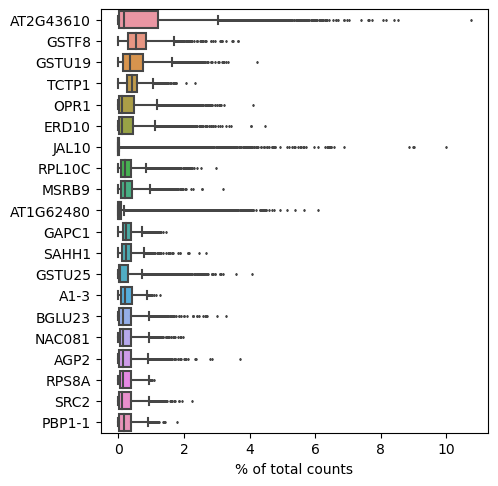

In [14]:
# Show genes that yield the highest fraction of counts in each single cell, across all cells.
sc.pl.highest_expr_genes(adata, n_top=20, )

To have high-quality data, cells with less than 200 genes and genes that occur in less than 3 cells are removed.

In [15]:
# Basic filtering
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [16]:
adata

AnnData object with n_obs × n_vars = 4727 × 21678
    obs: 'n_genes'
    var: 'n_cells'

Poor quality samples can be identified by looking at mitochondrial contamination from dead or dying cells. Here, the mitochondrial genes are visualized.

In [17]:
# Annotate mitochondrial genes, which are important for quality control (indicates possible poor-quality cells)
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

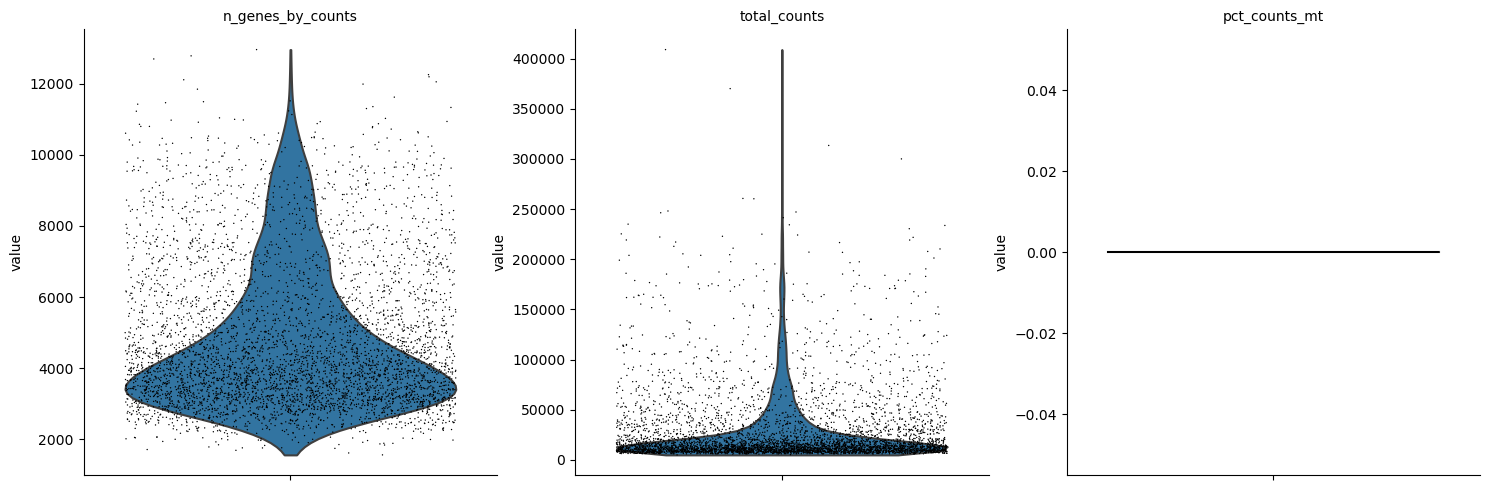

In [18]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

The violin plots of the mitochondrial genes indicate that these genes were already removed from the dataset. Therefore, we don't have to take this into account. 

Cells with a high amount of genes expressed are also removed.

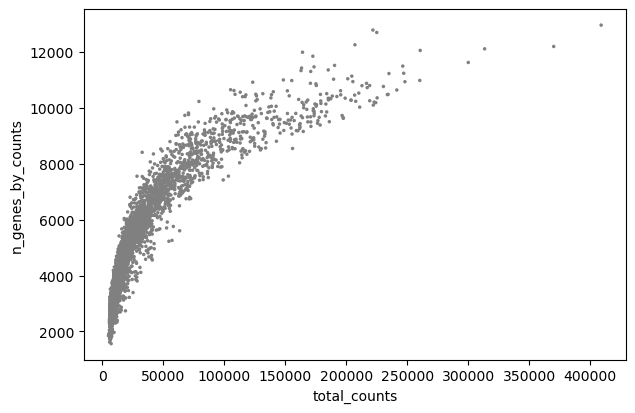

In [19]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [20]:
# Filter bad-quality cells out
adata = adata[adata.obs.n_genes_by_counts < 12000, :]

In [21]:
adata

View of AnnData object with n_obs × n_vars = 4720 × 21678
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

The data is normalized and log-transformed to make it more comparable.

In [22]:
# Library-size correction
sc.pp.normalize_total(adata)

C:\Users\lotte\anaconda3\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [23]:
# Logarithmize the data
sc.pp.log1p(adata)

In [24]:
adata.raw = adata

## Principle Component Analysis

At the moment, the data has 21678 dimensions ( = amount of genes). It will be very computer-intensive to use all this information. Therefore, the amount of dimensions will be reduced while maintaining as much of the information as possible using Principle Component Analysis (PCA).

In [25]:
sc.tl.pca(adata, svd_solver='arpack')

The expression of SOMBRERO (SMB), a root cap specific marker, can be mapped on the first two principle components:

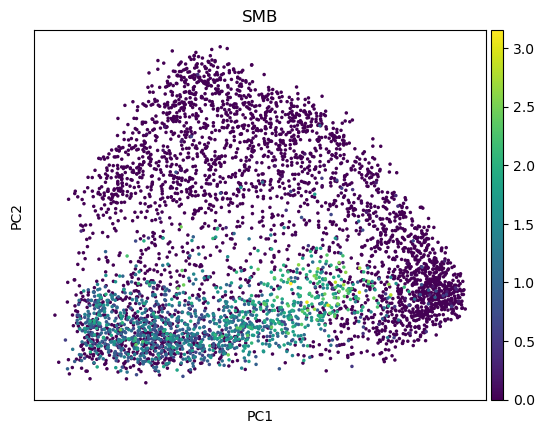

In [26]:
#SMB is a marker gene for the root cap
sc.pl.pca(adata, color='SMB')

Principle components have a decreasing contribution to the total variance:

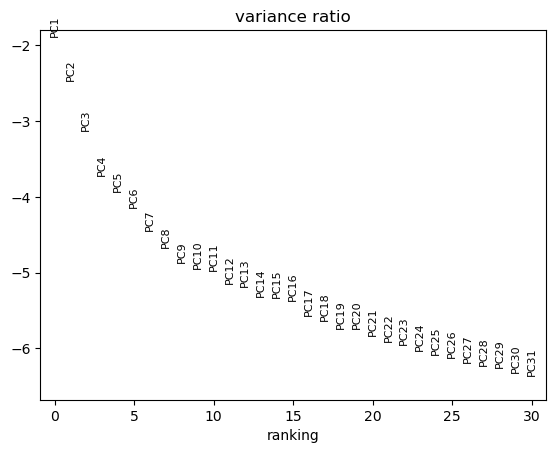

In [27]:
# Look at contribution of single PCs to the total variance
sc.pl.pca_variance_ratio(adata, log=True)

In [28]:
adata.write(results_file)
adata

AnnData object with n_obs × n_vars = 4720 × 21678
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

## Compute the neighborhood graph

The neighborhood graph of the data is calculated using 30 neighbors and 50 principle components.

In [29]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=50)

## Embedding the neighborhood graph

The data can be visualized using UMAP.

In [30]:
sc.tl.umap(adata)

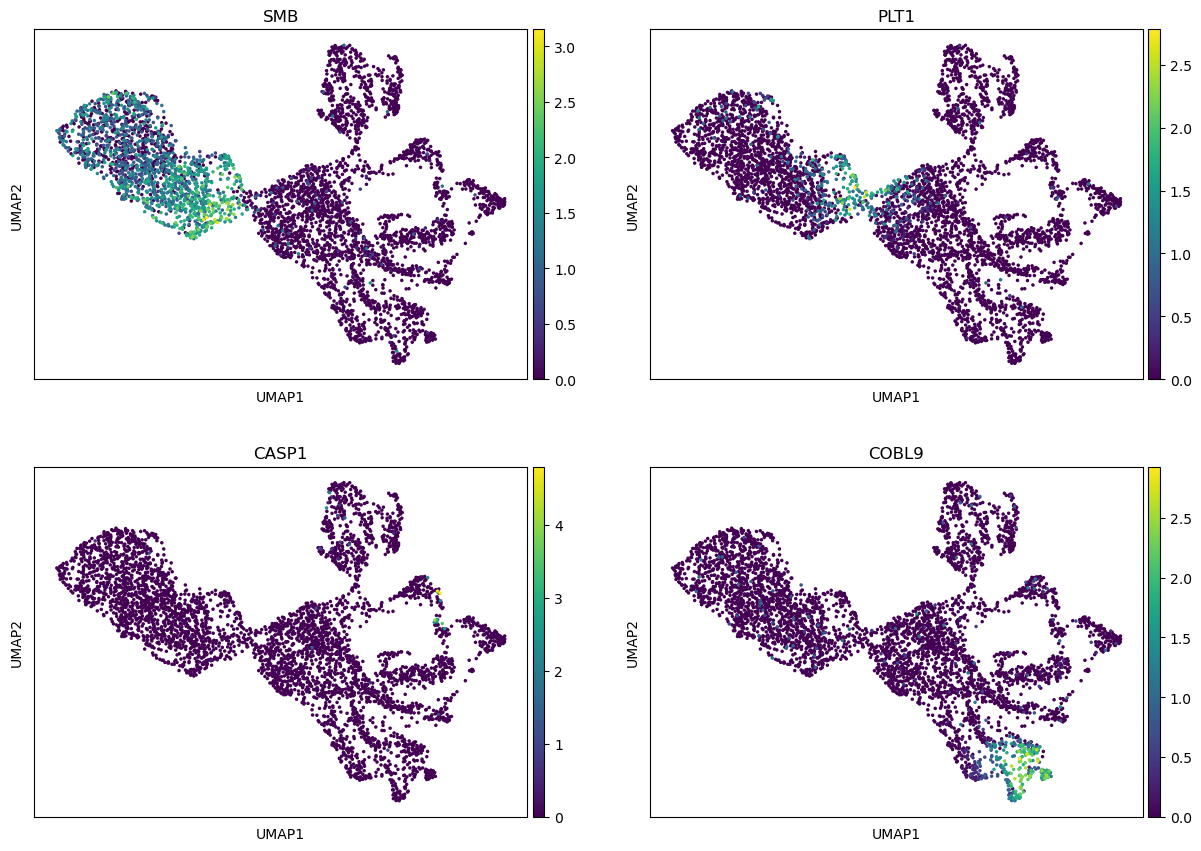

In [31]:
# SMB = root cap (QC + columella + LRC)
# PLT1 = quiescence centre
# CASP1 = endodermis
# COW1 = trichoblast
sc.pl.umap(adata, color=['SMB','PLT1', 'CASP1', 'COBL9'], ncols = 2)

Mapping marker genes after preprocessing:

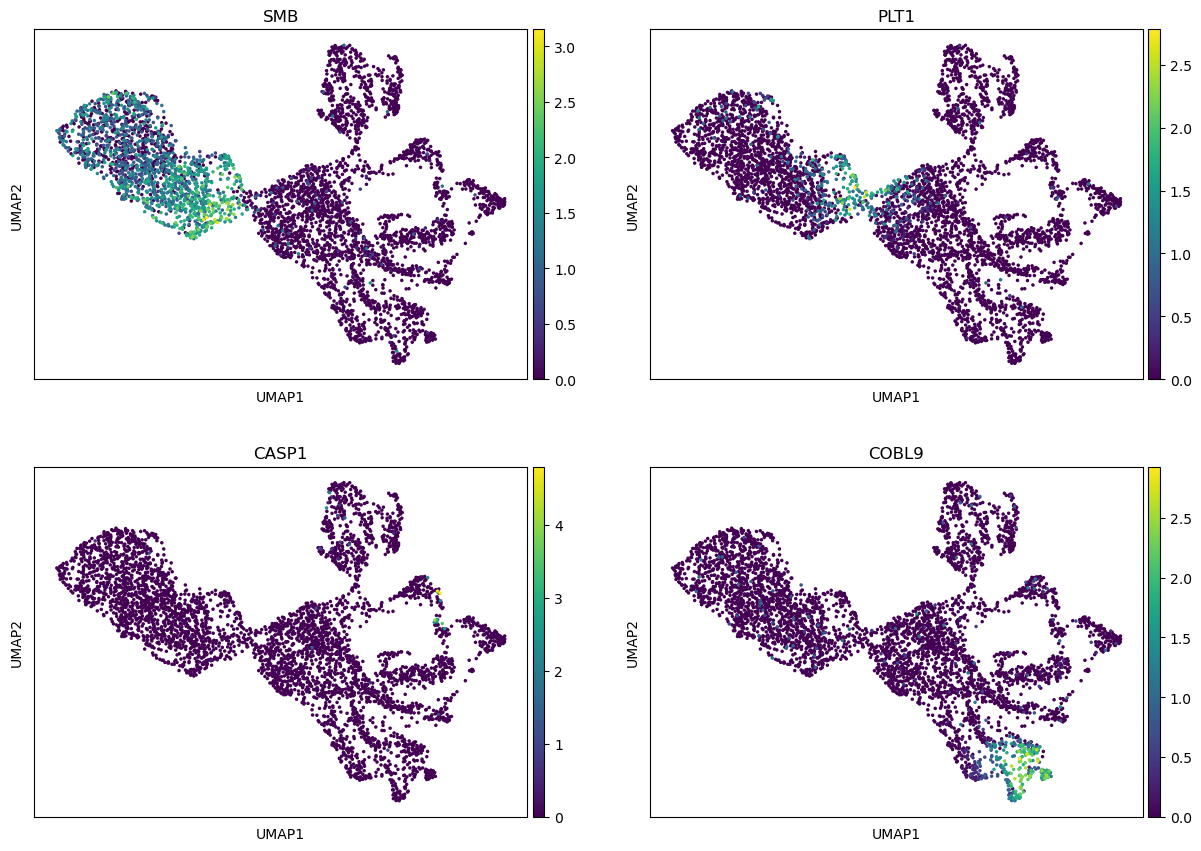

In [32]:
sc.pl.umap(adata, color=['SMB','PLT1', 'CASP1', 'COBL9'], use_raw=False, ncols = 2)

## Clustering the neighborhood graph

Based on the neighborhood graph, the data can be clustered by Louvain clustering. Different resolutions are being tested.

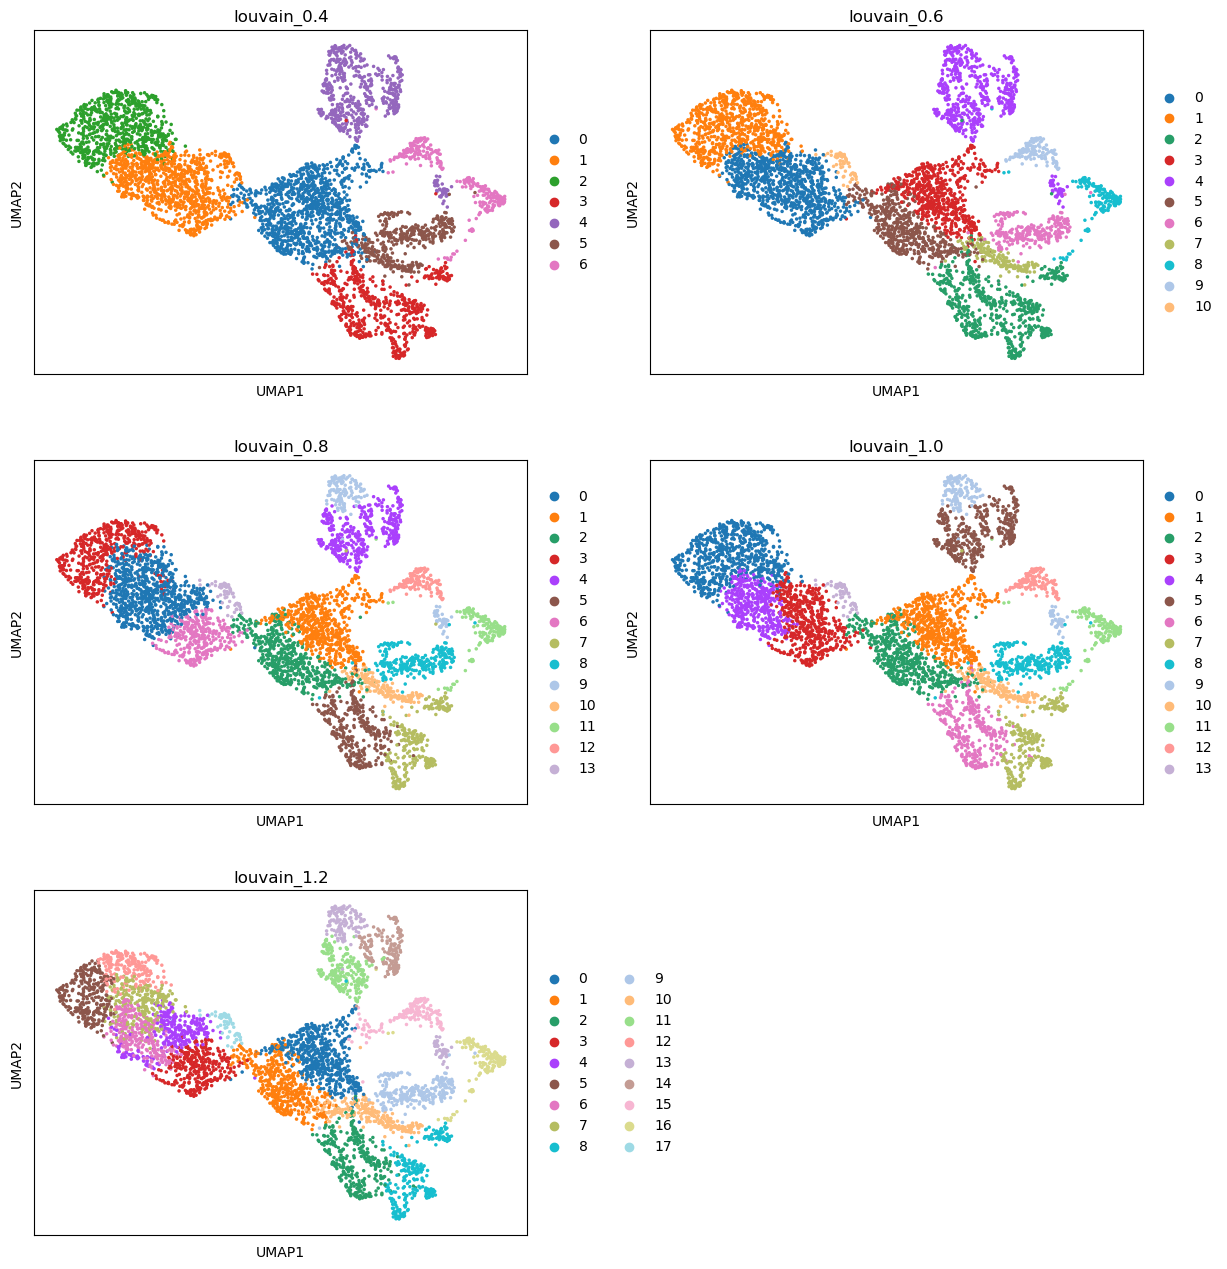

In [33]:
# Louvain clustering
sc.tl.louvain(adata, key_added = "louvain_1.0") # default resolution in 1.0
sc.tl.louvain(adata, resolution = 0.6, key_added = "louvain_0.6")
sc.tl.louvain(adata, resolution = 0.4, key_added = "louvain_0.4")
sc.tl.louvain(adata, resolution = 0.8, key_added = "louvain_0.8")
sc.tl.louvain(adata, resolution = 1.4, key_added = "louvain_1.2")

sc.pl.umap(adata, color=['louvain_0.4', 'louvain_0.6', 'louvain_0.8', 'louvain_1.0','louvain_1.2'], ncols=2)

In [34]:
adata.write(results_file)
#data.uns['log1p']["base"] = None

## Finding marker genes

For each cluster of the Louvain clustering with a resolution of 1.0, highly differential genes are identified using t-tests.

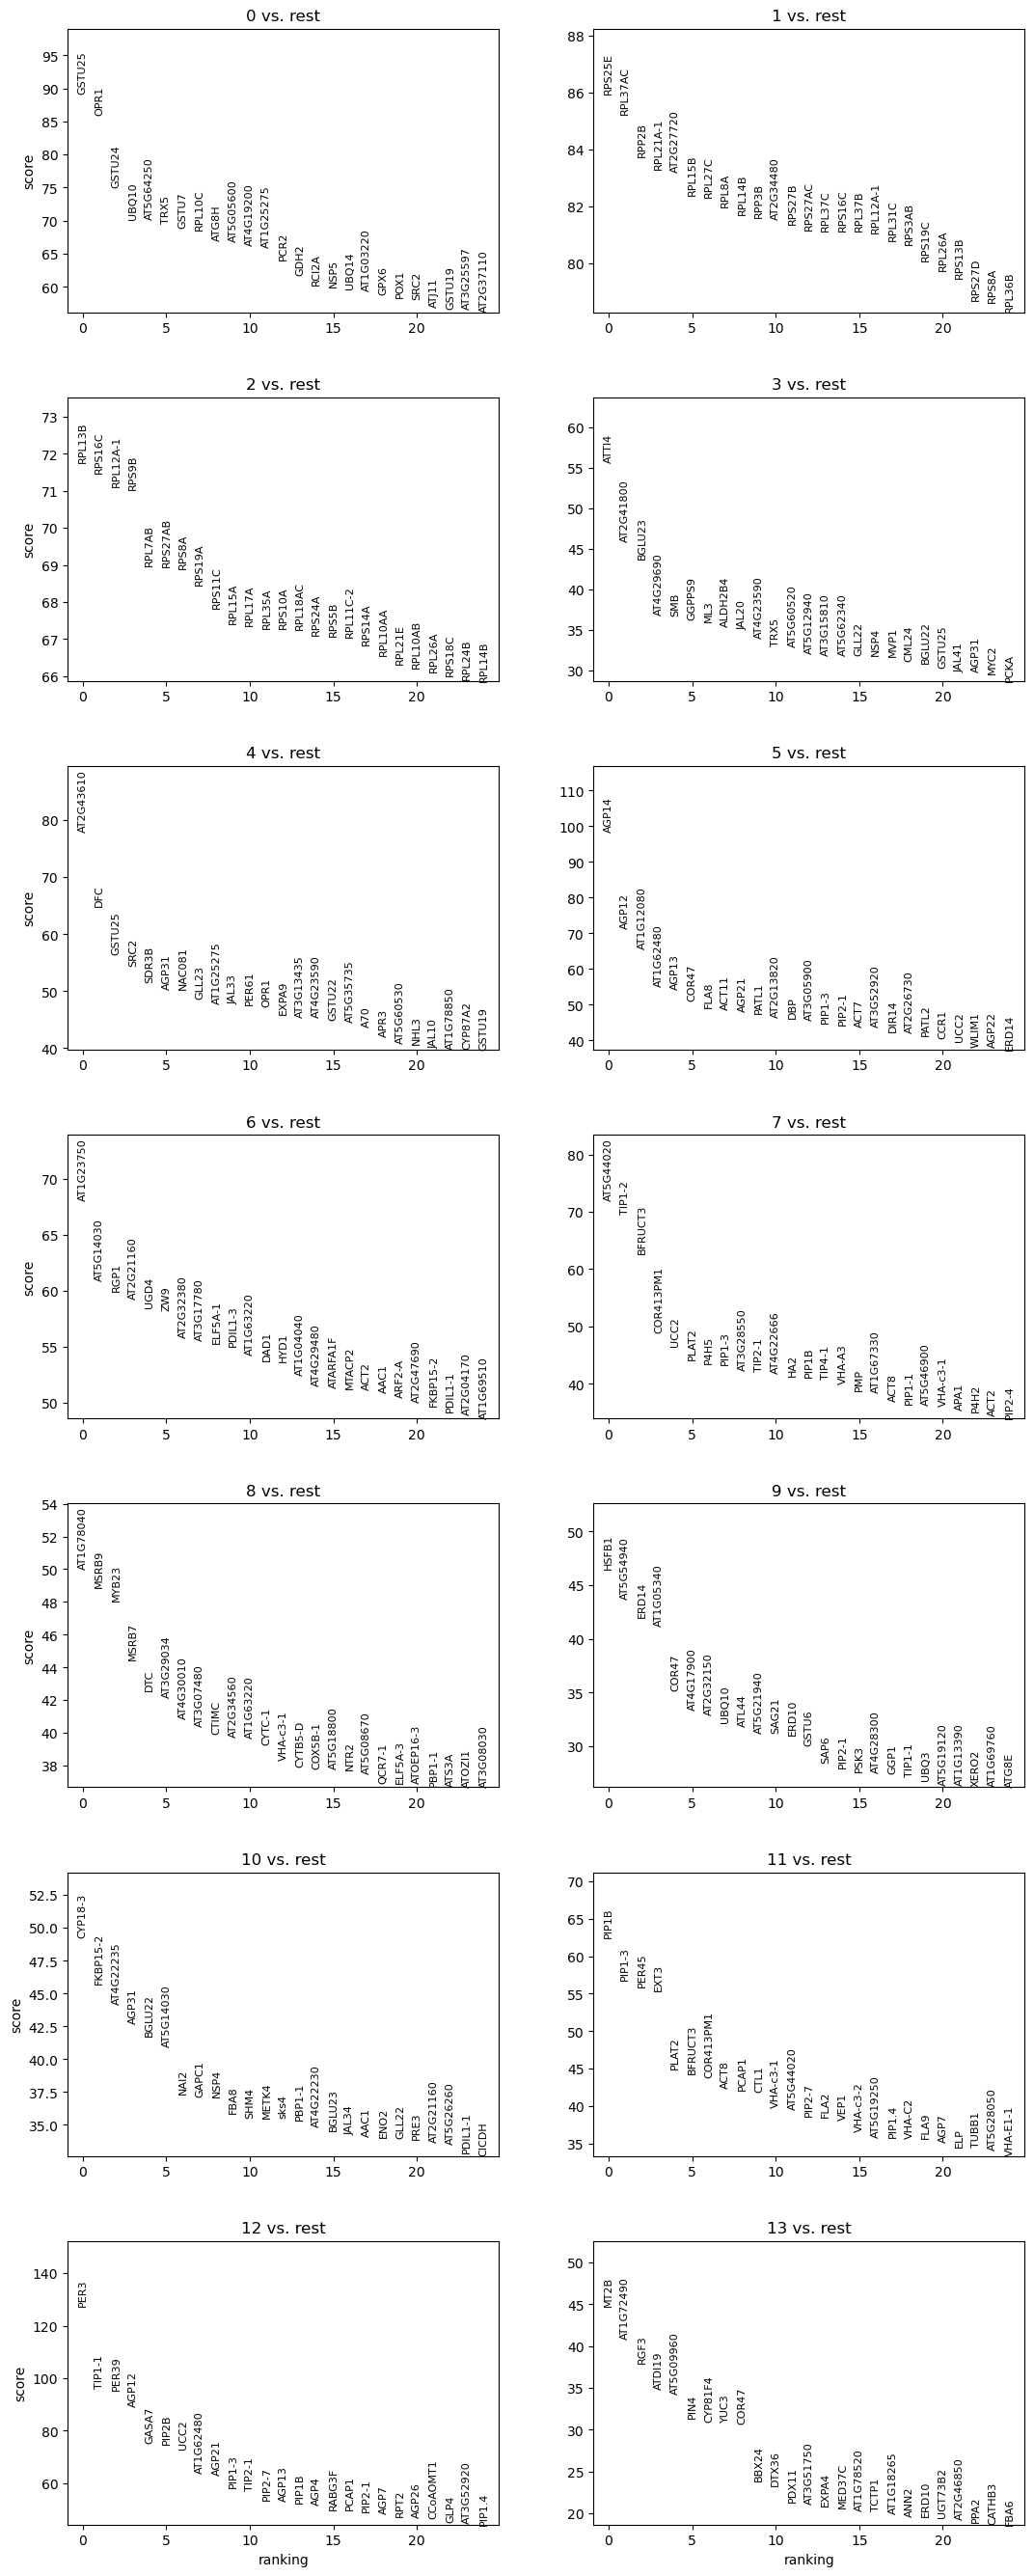

In [35]:
# Compute a ranking for the highly differential genes in each cluster
sc.tl.rank_genes_groups(adata, groupby='louvain_1.0', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, ncols=2)

In [36]:
sc.settings.verbosity = 2  # reduce the verbosity
adata.write(results_file)
#data.uns['log1p']["base"] = None

In [37]:
adata = sc.read(results_file)

In [38]:
# Show the top 10 ranked genes per cluster
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

0          1         2          3          4          5          6  \
0     GSTU25     RPS25E    RPL13B      ATTI4  AT2G43610      AGP14  AT1G23750   
1       OPR1    RPL37AC    RPS16C  AT2G41800        DFC      AGP12  AT5G14030   
2     GSTU24      RPP2B  RPL12A-1     BGLU23     GSTU25  AT1G12080       RGP1   
3      UBQ10   RPL21A-1     RPS9B  AT4G29690       SRC2  AT1G62480  AT2G21160   
4  AT5G64250  AT2G27720    RPL7AB        SMB      SDR3B      AGP13       UGD4   
5       TRX5     RPL15B   RPS27AB     GGPPS9      AGP31      COR47        ZW9   
6      GSTU7     RPL27C     RPS8A        ML3     NAC081       FLA8  AT2G32380   
7     RPL10C      RPL8A    RPS19A    ALDH2B4      GLL23      ACT11  AT3G17780   
8      ATG8H     RPL14B    RPS11C      JAL20  AT1G25275      AGP21    ELF5A-1   
9  AT5G05600      RPP3B    RPL15A  AT4G23590      JAL33      PATL1    PDIL1-3   

           7          8          9         10         11         12         13  
0  AT5G44020  AT1G78040      HSFB1    CYP18-3      PIP1B       PER3       MT2B  
1     TIP1-2      MSRB9  AT5G54940   FKBP15-2     PIP1-3     TIP1-1  AT1G72490  
2    BFRUCT3      MYB23      ERD14  AT4G22235      PER45      PER39       RGF3  
3  COR413PM1      MSRB7  AT1G05340      AGP31       EXT3      AGP12     ATDI19  
4       UCC2        DTC      COR47     BGLU22      PLAT2      GASA7  AT5G09960  
5      PLAT2  AT3G29034  AT4G17900  AT5G14030    BFRUCT3      PIP2B       PIN4  
6       P4H5  AT4G30010  AT2G32150       NAI2  COR413PM1       UCC2    CYP81F4  
7     PIP1-3  AT3G07480      UBQ10      GAPC1       ACT8  AT1G62480       YUC3  
8  AT3G28550      CTIMC      ATL44       NSP4      PCAP1      AGP21      COR47  
9     TIP2-1  AT2G34560  AT5G21940       FBA8       CTL1     PIP1-3      BBX24

In [39]:
# Get table with scores and groups
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
top_DEG_genes = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']})
top_DEG_genes.head(10)

0_n  0_p        1_n  1_p       2_n  2_p        3_n            3_p  \
0     GSTU25  0.0     RPS25E  0.0    RPL13B  0.0      ATTI4  6.850244e-279   
1       OPR1  0.0    RPL37AC  0.0    RPS16C  0.0  AT2G41800  2.097788e-229   
2     GSTU24  0.0      RPP2B  0.0  RPL12A-1  0.0     BGLU23  2.595264e-256   
3      UBQ10  0.0   RPL21A-1  0.0     RPS9B  0.0  AT4G29690  7.657229e-159   
4  AT5G64250  0.0  AT2G27720  0.0    RPL7AB  0.0        SMB  5.182935e-155   
5       TRX5  0.0     RPL15B  0.0   RPS27AB  0.0     GGPPS9  2.673685e-155   
6      GSTU7  0.0     RPL27C  0.0     RPS8A  0.0        ML3  1.256090e-183   
7     RPL10C  0.0      RPL8A  0.0    RPS19A  0.0    ALDH2B4  3.661298e-161   
8      ATG8H  0.0     RPL14B  0.0    RPS11C  0.0      JAL20  1.297140e-158   
9  AT5G05600  0.0      RPP3B  0.0    RPL15A  0.0  AT4G23590  1.425173e-155   

         4_n            4_p  ...        9_n            9_p       10_n  \
0  AT2G43610   0.000000e+00  ...      HSFB1  1.242849e-109    CYP18-3   
1        DFC  3.388509e-303  ...  AT5G54940  1.251780e-120   FKBP15-2   
2     GSTU25   0.000000e+00  ...      ERD14  9.182480e-111  AT4G22235   
3       SRC2   0.000000e+00  ...  AT1G05340   1.556022e-96      AGP31   
4      SDR3B  4.090695e-250  ...      COR47   1.238605e-88     BGLU22   
5      AGP31  2.340361e-277  ...  AT4G17900   1.820916e-81  AT5G14030   
6     NAC081  1.817967e-295  ...  AT2G32150   6.235328e-84       NAI2   
7      GLL23  7.653746e-196  ...      UBQ10   6.432465e-89      GAPC1   
8  AT1G25275  1.251784e-236  ...      ATL44   9.455205e-78       NSP4   
9      JAL33  1.764068e-219  ...  AT5G21940   8.171204e-79       FBA8   

            10_p       11_n           11_p       12_n           12_p  \
0  9.652116e-128      PIP1B  4.402731e-146       PER3  5.307819e-140   
1  6.848721e-137     PIP1-3  9.503213e-138     TIP1-1  5.938220e-181   
2  1.584321e-110      PER45  3.470184e-123      PER39  1.180561e-121   
3  4.366630e-126       EXT3  1.329516e-108      AGP12  1.422542e-237   
4  1.036334e-120      PLAT2  1.821488e-113      GASA7  2.782005e-108   
5  4.329279e-123    BFRUCT3   2.365604e-99      PIP2B  1.086146e-129   
6  3.470180e-107  COR413PM1  8.886359e-110       UCC2  2.784217e-141   
7   4.201570e-96       ACT8  2.722732e-115  AT1G62480  2.270555e-125   
8   3.003994e-94      PCAP1   4.303103e-96      AGP21  4.507361e-112   
9  4.074436e-101       CTL1   3.603883e-99     PIP1-3  2.867214e-124   

        13_n          13_p  
0       MT2B  5.008845e-56  
1  AT1G72490  1.485233e-48  
2       RGF3  2.295393e-46  
3     ATDI19  5.575251e-48  
4  AT5G09960  6.564612e-44  
5       PIN4  1.667950e-41  
6    CYP81F4  1.589698e-44  
7       YUC3  8.650467e-41  
8      COR47  2.030873e-44  
9      BBX24  5.040230e-35  

[10 rows x 28 columns]

## Cell type identification

A cell type is assigned to the clusters by looking if one of the top differentially expressed genes is a known marker gene for a certain cell type. First, the list with known marker genes in read into a pandas dataframe.

In [40]:
# Read list of known marker genes
marker_genes_pd = pd.read_excel('marker_genes_literature.xlsx', sheet_name="Sheet1")
marker_genes = marker_genes_pd["Marker gene"].tolist()
print(marker_genes_pd)

               Cell type Marker gene Source
0           atrichoblast     ATXTH17    NaN
1           atrichoblast         GL2    NaN
2           atrichoblast       MYB23    NaN
3           atrichoblast      WRKY44    NaN
4              columella        AMY3    NaN
..                   ...         ...    ...
93                 Xylem        VND2    NaN
94                 Xylem        VND5    NaN
95  Xylem Pole Pericycle        DOT1    NaN
96  Xylem Pole Pericycle         XPP    NaN
97       young columella        LZY2   DRO3

[98 rows x 3 columns]


For the top 500 differential expressed genes per cluster, it is checked if it is a known marker gene. If this is the case, the genes is added to a list with detected marker genes and a message is printed.

In [41]:
# For significantly differential expressed genes, check if they are in list of known marker genes
detected_marker_genes = []
for i in range(0,14):
    for j in range(0,500):
        if top_DEG_genes.loc[j][str(i)+"_n"] in marker_genes:
            row = marker_genes_pd[marker_genes_pd["Marker gene"]== top_DEG_genes.loc[j][str(i)+"_n"]].index.values
            cell_type = marker_genes_pd.loc[row[0]][0]
            detected_marker_genes.append(top_DEG_genes.loc[j][str(i)+"_n"])
            print(f'Cluster {i} has the marker gene {top_DEG_genes.loc[j][str(i)+"_n"]} that is a marker for {cell_type}.')
            
print(detected_marker_genes)

Cluster 0 has the marker gene AT3G61930 that is a marker for Distal Columella.
Cluster 0 has the marker gene BRN2 that is a marker for Columella (1st Outer Layer) + LRC (1st Outer Layer).
Cluster 3 has the marker gene SMB that is a marker for Columella + LRC.
Cluster 3 has the marker gene WER that is a marker for LRC + Atrichoblast.
Cluster 3 has the marker gene ARF16 that is a marker for root cap.
Cluster 3 has the marker gene ACR4 that is a marker for QC.
Cluster 4 has the marker gene BRN2 that is a marker for Columella (1st Outer Layer) + LRC (1st Outer Layer).
Cluster 4 has the marker gene SMB that is a marker for Columella + LRC.
Cluster 4 has the marker gene ACR4 that is a marker for QC.
Cluster 5 has the marker gene DAG1 that is a marker for Stele.
Cluster 5 has the marker gene SHR that is a marker for Stele.
Cluster 7 has the marker gene COBL9 that is a marker for trichoblast.
Cluster 7 has the marker gene GT16 that is a marker for trichoblast.
Cluster 8 has the marker gene MYB

The expression of the detected marker genes is visualized with a dotplot.

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_louvain_1.0']`


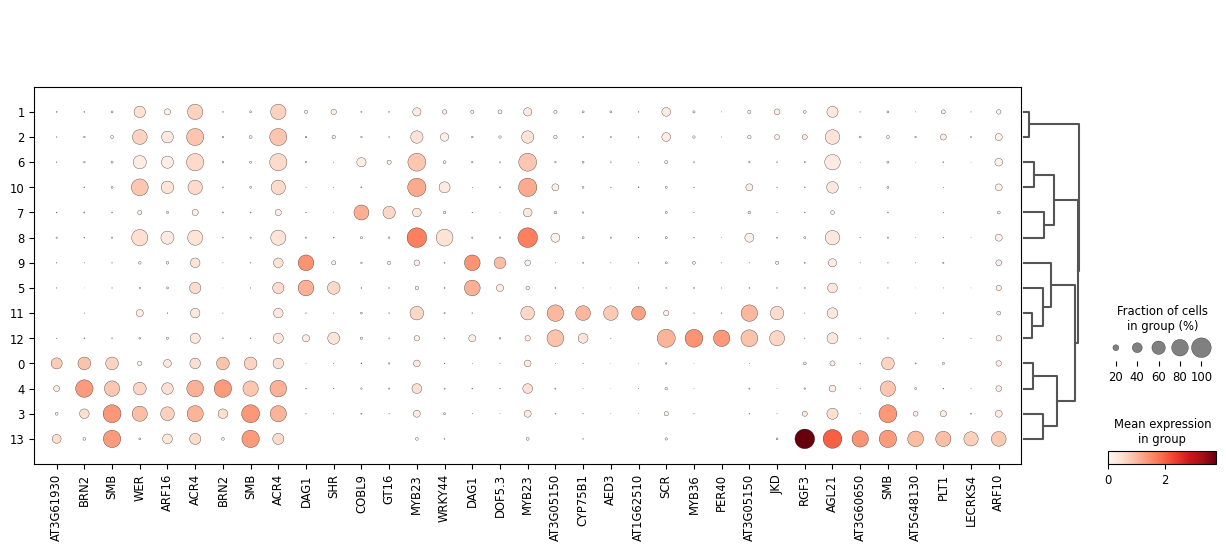

In [42]:
sc.pl.dotplot(adata, detected_marker_genes, groupby='louvain_1.0', dendrogram = True);

Based on the known marker gene and their expression pattern in the BAR eFP Browser, cell types of certain clusters can be identified:

- Cluster 5: Stele
- Cluster 7: Trichoblast
- Cluster 8: Atrichoblast
- Cluster 9: Stele
- Cluster 11: Cortex
- Cluster 12: Endodermis
- Cluster 13: Quiescent centre

Cluster 0, 3 and 4 contain root cap cells, but a distinction between these cluster cannot be made based on the known marker genes.

Cluster 10 has also a marker for atrichoblasts, and as can be seen on the UMAP visualization, it lies next to cluster 8. It could be that an overclustering happened and that these cluster form one cell type, namely atrichoblasts.

Cluster 1, 2 and 13 have no reported marker genes.

To see if there is overclustering, a correlation matrix can be made between the clusters.

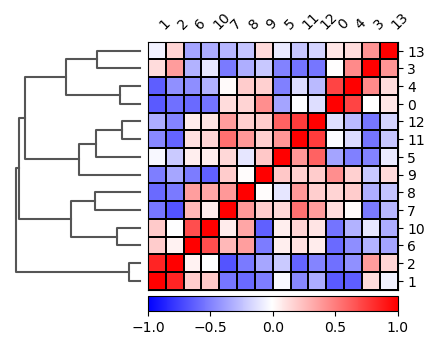

In [43]:
# Plot correlation between clusters
ax = sc.pl.correlation_matrix(adata, 'louvain_1.0', figsize=(5,3.5))

Clusters 1 and 2 are highly correlated, which could mean that they are in fact the same cell type. Clusters 6 and 10 are also highly correlated. This implicates that cluster 10 is more related to cluster 6 than to cluster 8, meaning that cluster 10 is probably not of the same cell type as cluster 8 (atrichoblast). High correlation can be seen between clusters 11 and 12. The endodermis is the innermost cortical cell layer. This explains the high similarity in expression profiles. Clusters 0, 3, 4 and 13 are also correlated to eachother. This explains the difficulty to distinguish between them and to assign distinct cell types to these clusters.

To assign a cell type to the unknown clusters (1, 2, 6 and 10), the top differential genes for each cluster can be looked up in literature to see if their expression pattern is already known. First, a dotplot of the expression and the logfold changes of the top 5 genes per cluster is shown.

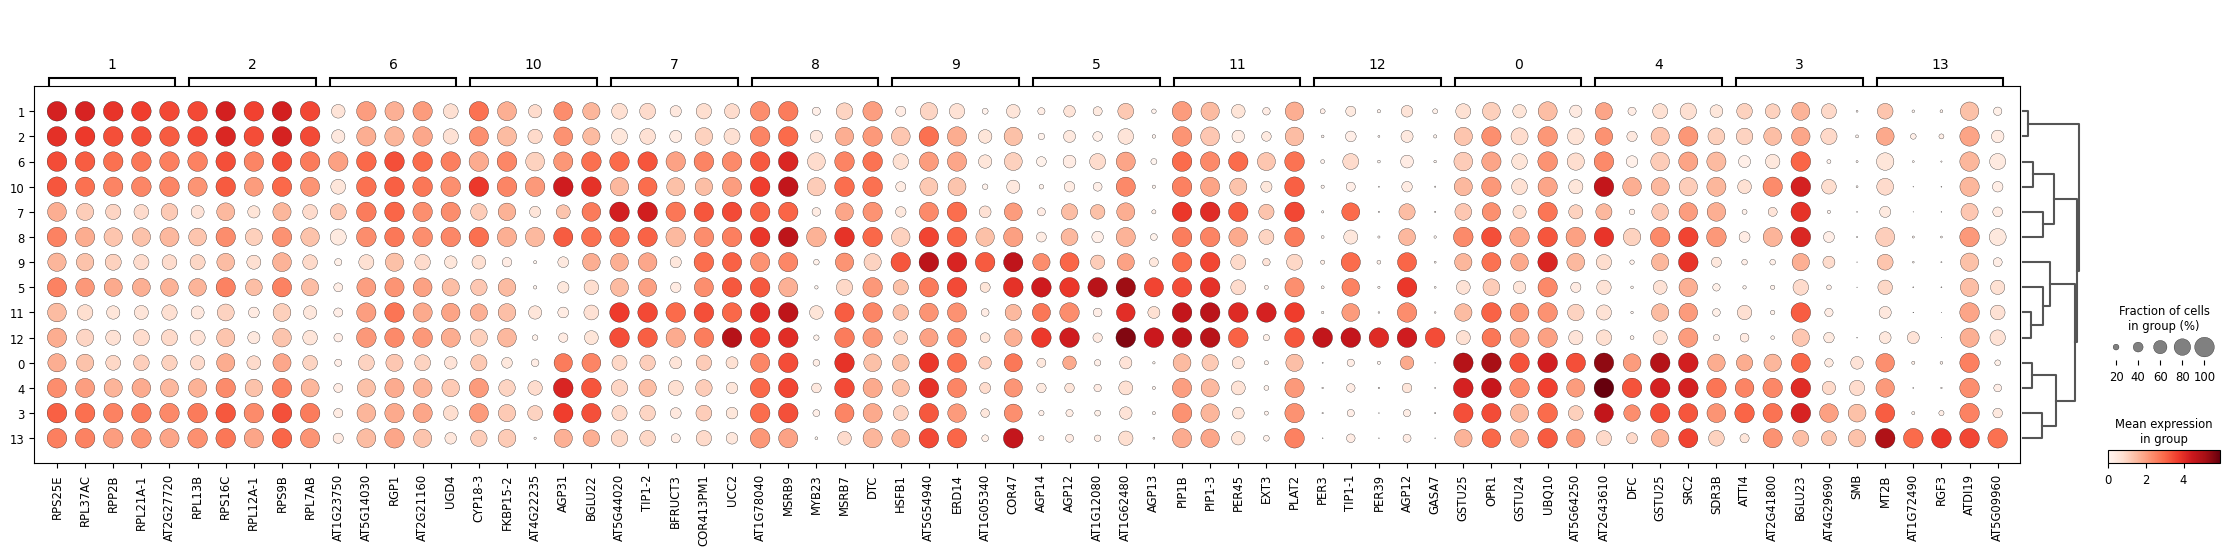

In [44]:
# Dotplot of the highest scoring genes in the dataset
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5)

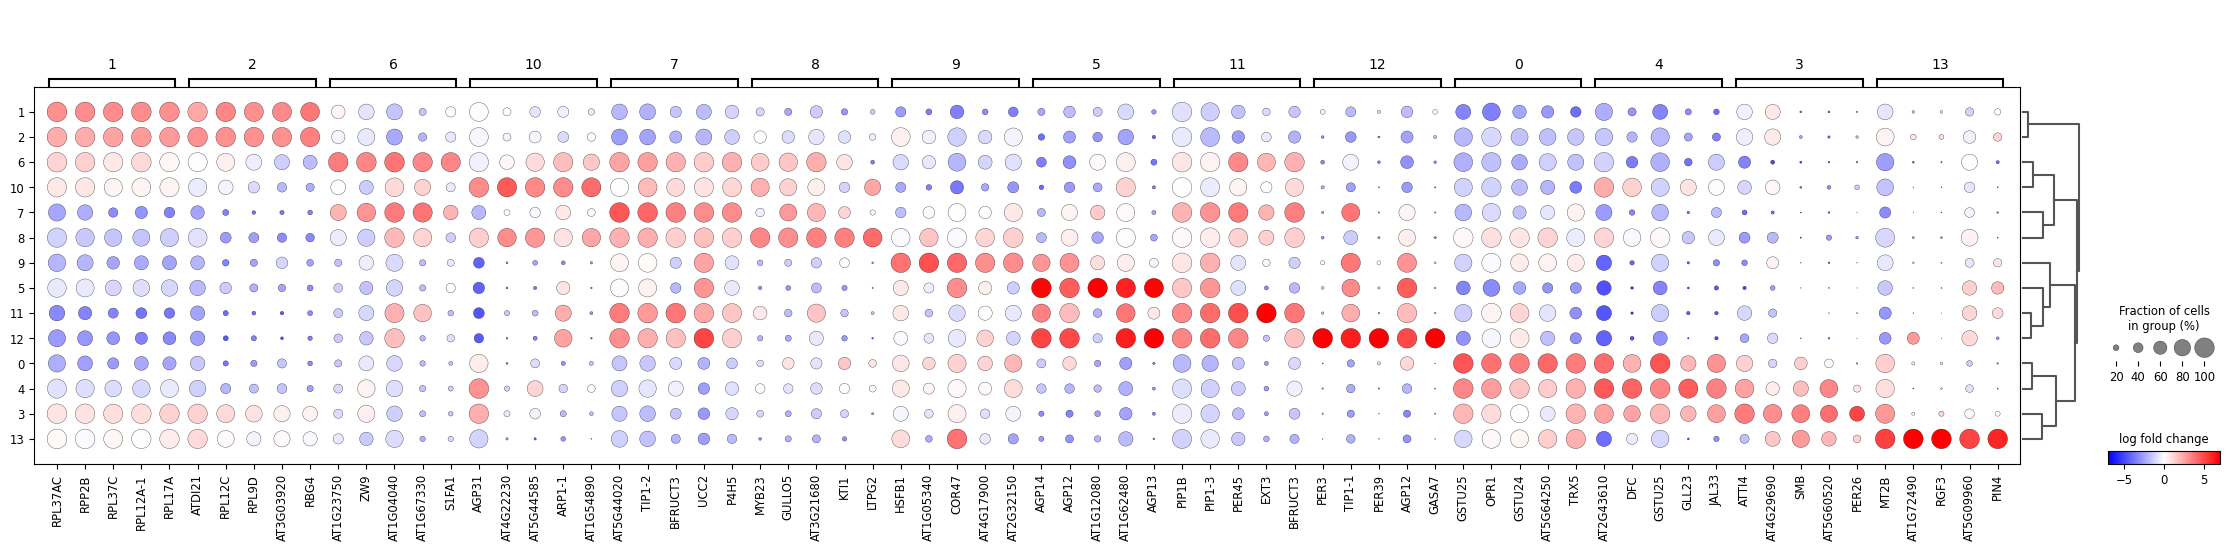

In [45]:
# Dotplot of the logfold changes
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, values_to_plot='logfoldchanges', min_logfoldchange=3, vmax=7, vmin=-7, cmap='bwr')

In cluster 1 and 2, predominantly ribosomal proteins are differentially upregulated. Expression patterns in both clusters are very similar. Using the BAR eFP browser, the expression profile of these genes could be visualized. They are all expressed in the meristematic zone. Cluster 6 and cluster 10 are difficult to assign a cell type to. It could be possible that cluster 6 contains trichoblast precursor cells, as the AT1G67330 is highly expressed in these cells and has moderate expression in the actual trichoblasts, which corresponds with the found expression profile in this analysis. The cell type of cluster 10 could not be determined.

In [46]:
new_cluster_names = ["Root cap 1", 
                     "Meristem 1", 
                     "Meristem 2", 
                     "Root cap 2", 
                     "Root cap 3", 
                     "Stele 1", 
                     "Trichoblast precursor", 
                     "Trichoblast", 
                     "Atrichoblast", 
                     "Stele 2",
                     "Unknown",
                     "Cortex",
                     "Endodermis",
                     "QC"]
adata.rename_categories("louvain_1.0", new_cluster_names)

C:\Users\lotte\anaconda3\lib\site-packages\anndata\_core\anndata.py:1160: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  self.obs[key].cat.rename_categories(categories, inplace=True)


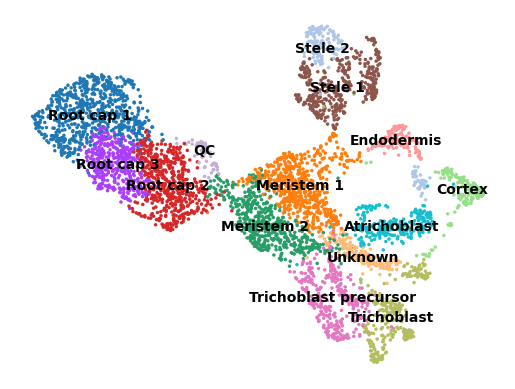

In [47]:
sc.pl.umap(adata, color='louvain_1.0', legend_loc='on data', title='', frameon=False, save='GSE123818.png')

## Number of cells per cluster

To compare this clustering with other datasets, the number of cells per clusters are shown below.

In [48]:
adata.obs.groupby(["louvain_1.0"]).apply(len)

louvain_1.0
Root cap 1               706
Meristem 1               592
Meristem 2               524
Root cap 2               523
Root cap 3               424
Stele 1                  402
Trichoblast precursor    338
Trichoblast              261
Atrichoblast             255
Stele 2                  173
Unknown                  171
Cortex                   157
Endodermis               128
QC                        66
dtype: int64